In [2]:
import numpy as np
import scipy 
import math

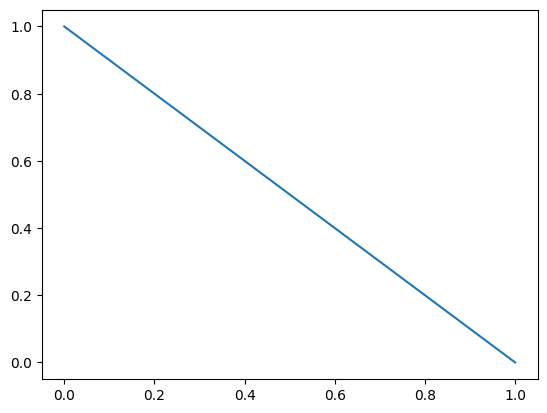

In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plot

G = 6.67*(10**-11)
k = 2
c = 3*(10**8)
GA = 0.4

def f(d,r):
    return ((((4*r*G*(math.pi))/(k*GA))*((d**(2- GA)) + (k*d/c**2))*(d/3 + (k*(d**GA)/c**2)))/(1 - (8*G*math.pi*(r**2)*d)/(3*(c**2))))

def RK4(d,r,h):
   k1 = f(d,r)
   k2 = f(d+h/2,  r+(h*k1)/2)
   k3 = f(d+h/2 , r+(h*k2)/2)
   k4 = f(d+h,    r+h*k3)
    
   d = d + (h/6)*(k1 +2*k2 + 2*k3 + k4)
   r = r+h
    
   return d

#Solve
d = np.linspace(1,0,200)
r = np.linspace(0,1,200)
h = 0.01

plot.plot(r , RK4(d,r,h))


In [45]:
#Initials
import math 

def R0(Pc,dp):
   dc = (Pc/k)**(1/GA)
   P = Pc - dp 
   #d = dc**(1- GA) - dp/(k*GA*((P/k)**((1- GA)/GA)))**(1/(1- GA))
   return  ((3/(2*pi*(3*Pc + dc)))*(math.log(((dc + Pc)/((P/k)**(1/GA) + P)))))**(0.5)

def M0(Pc,dp):
    dc = (Pc/k)**(1/GA)
    P = Pc - dp 
    #d = dc - dp/(k*GA*(d**(1- GA)))
    return (math.log((dc + Pc)/((P/k)**(1/GA) + P)))*(2*dc/(3*Pc + dc))*((3/(2*pi*(3*Pc + dc)))*(math.log((dc + Pc)/((P/k)**(1/GA) + P))))
    

Text(0, 0.5, 'm (kg)')

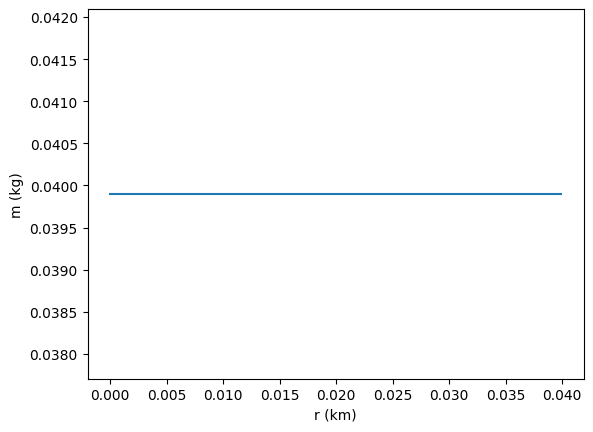

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

G = 1
k = 2
c = 1
GA = 0.4
pi = math.pi

K1 = 32*pi*(1.998*10**30)

def f(x,P):
   m,r = x
   d = (P/k)**(1/GA)
   dmdp = -(2*K1*(r**3)*(r-m))/((d + P)*(m + K1*P*(r**3)))
   drdp = (2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
   return [dmdp , drdp]

Ro = R0(Pc = 10**(-2),  dp =10**(-6))
Mo = M0(Pc = 10**(-2),  dp = 10**(-6))

x0 = [Mo,Ro]

P = np.linspace(10**(-6),0,1000)

solve = odeint(f,x0, P)

m =solve[:,0]
r = solve[:,1]

plot.plot(m,r)
plot.xlabel("r (km)")
plot.ylabel("m (kg)")
